# Data Analysis Challenge

## Part 1 - General Visualisation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import json
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('takehome.csv')

In [3]:
print(data.shape)
data.head()

(9999, 4)


,ltv,ttime,abt,tue
0,"{""n"":""250""}","{""n"":""1077572""}","{""n"":""31""}","{""n"":""38""}"
1,"{""n"":""49""}","{""n"":""60028""}","{""n"":""32""}","{""n"":""15""}"
2,"{""n"":""680""}","{""n"":""2018285""}","{""n"":""7""}","{""n"":""46""}"
3,"{""n"":""125""}","{""n"":""98142""}","{""n"":""11""}","{""n"":""15""}"
4,"{""n"":""450""}","{""n"":""115692""}","{""n"":""9""}","{""n"":""15""}"


In [4]:
data.info() 
print(data.apply(lambda x: sum(x.isnull()),axis=0)) # a few null values
print('Cell information is:', type(data.ltv[0])) # checking if dataframe values are dictionaries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 4 columns):
ltv      9998 non-null object
ttime    9999 non-null object
abt      9999 non-null object
tue      9997 non-null object
dtypes: object(4)
memory usage: 312.5+ KB
ltv      1
ttime    0
abt      0
tue      2
dtype: int64
Cell information is: <class 'str'>


In [5]:
# cleaning columns
data = data.replace([r'{"n":"', r'"}'], '', regex=True)
data = data.astype('float64')
data = data.dropna() # drop three rows with missing values
print('Correlation between columns:', '\n', data.corr(), '\n') # 
print('Column information: ', '\n', data.describe()) # Many outliers for ltv, ttime and tue columns

Correlation between columns: 
             ltv     ttime       abt       tue
ltv    1.000000  0.434548 -0.006529  0.580597
ttime  0.434548  1.000000 -0.017247  0.811910
abt   -0.006529 -0.017247  1.000000 -0.034958
tue    0.580597  0.811910 -0.034958  1.000000 

Column information:  
                ltv         ttime          abt           tue
count  9996.000000  9.996000e+03  9996.000000   9996.000000
mean    388.548219  1.455021e+07    30.284314    193.528311
std     417.700380  6.361143e+07    17.402454    551.032452
min       0.000000  0.000000e+00     1.000000     15.000000
25%     200.000000  1.148820e+05    15.000000     15.000000
50%     250.000000  8.482985e+05    30.000000     33.000000
75%     450.000000  4.450682e+06    45.000000    118.250000
max    8481.000000  1.735807e+09    60.000000  10563.000000


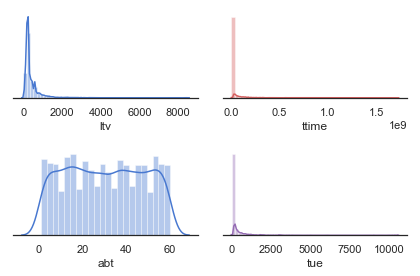

In [6]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, sharex=False)
sns.despine(left=True)

# Plot a simple distribution plots for big picture
sns.distplot(data.ltv,  color="b", ax=axes[0, 0])
sns.distplot(data.ttime, color="r", ax=axes[0, 1])
sns.distplot(data.abt, ax=axes[1, 0])
sns.distplot(data.tue, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

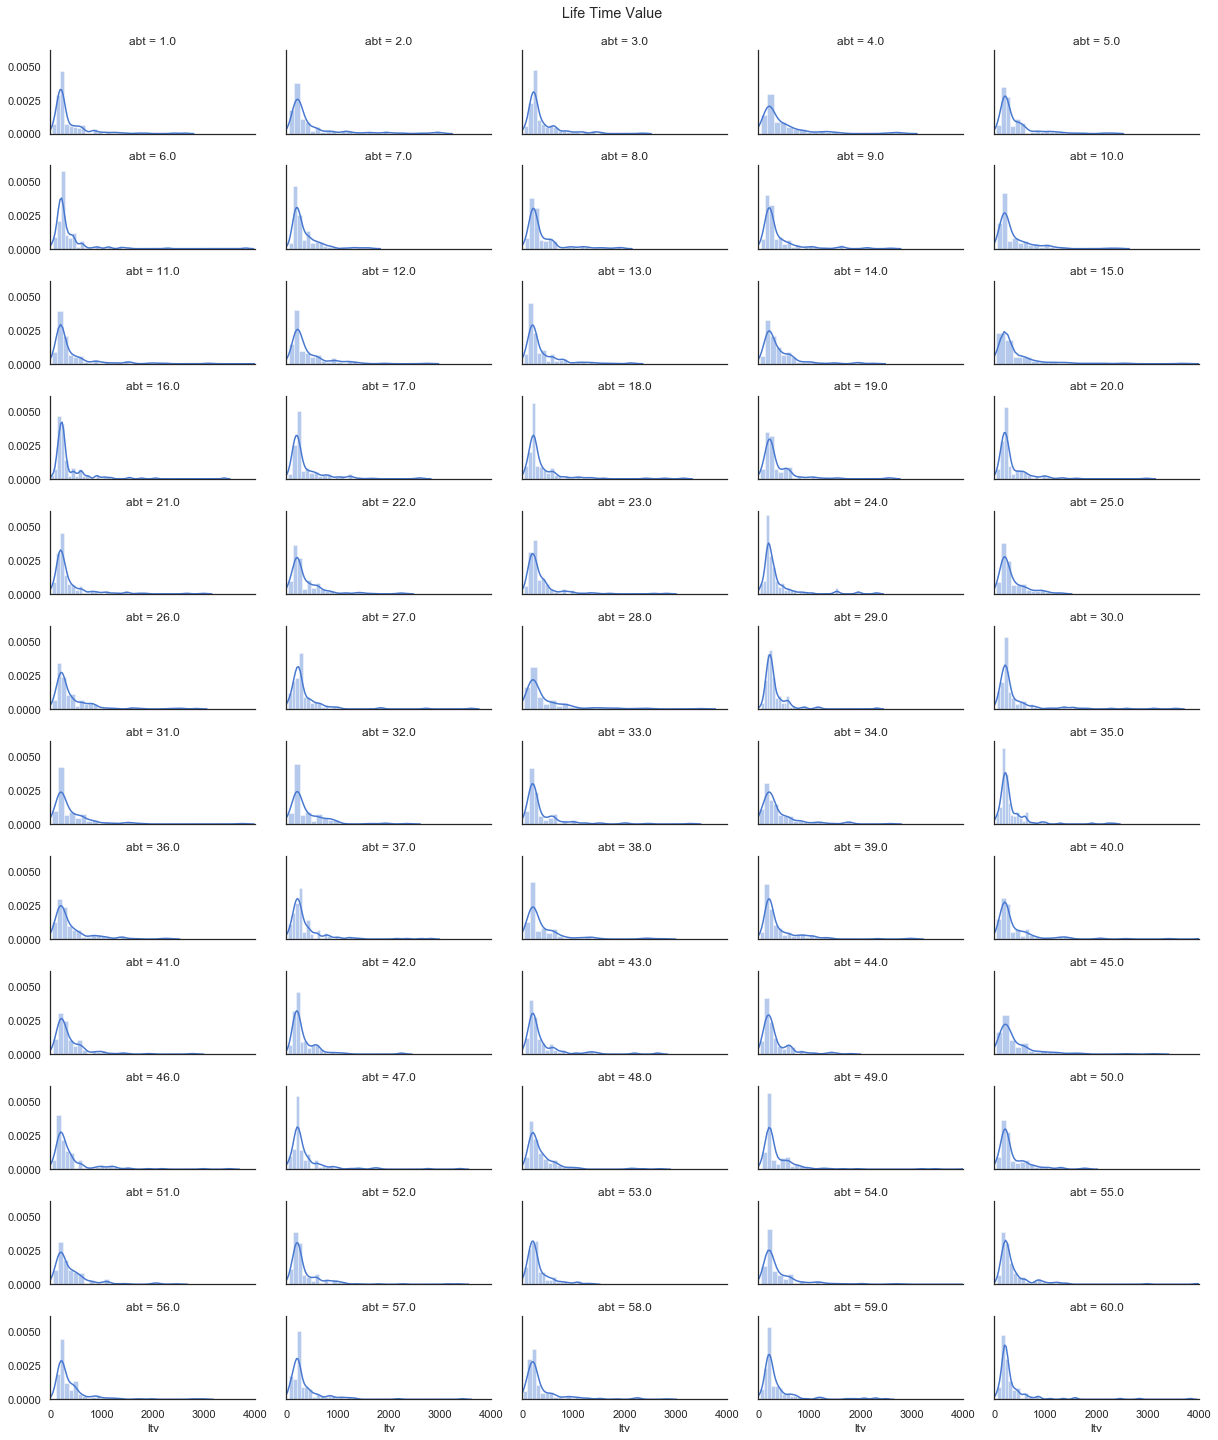

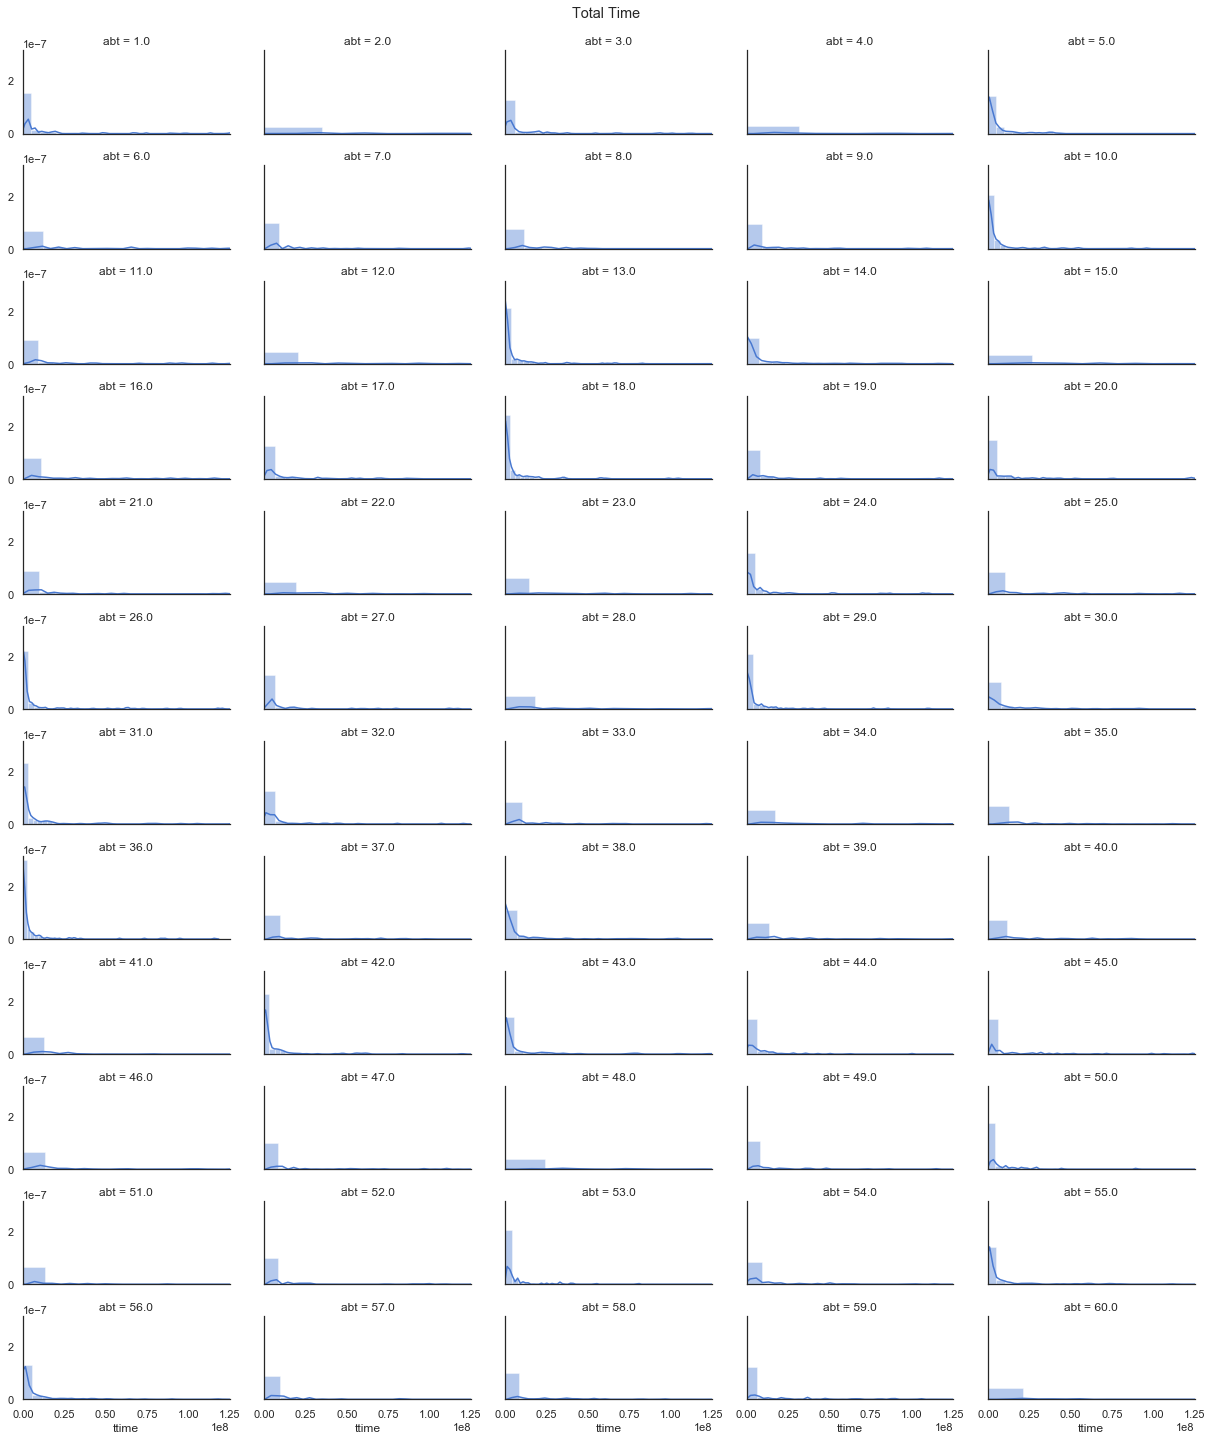

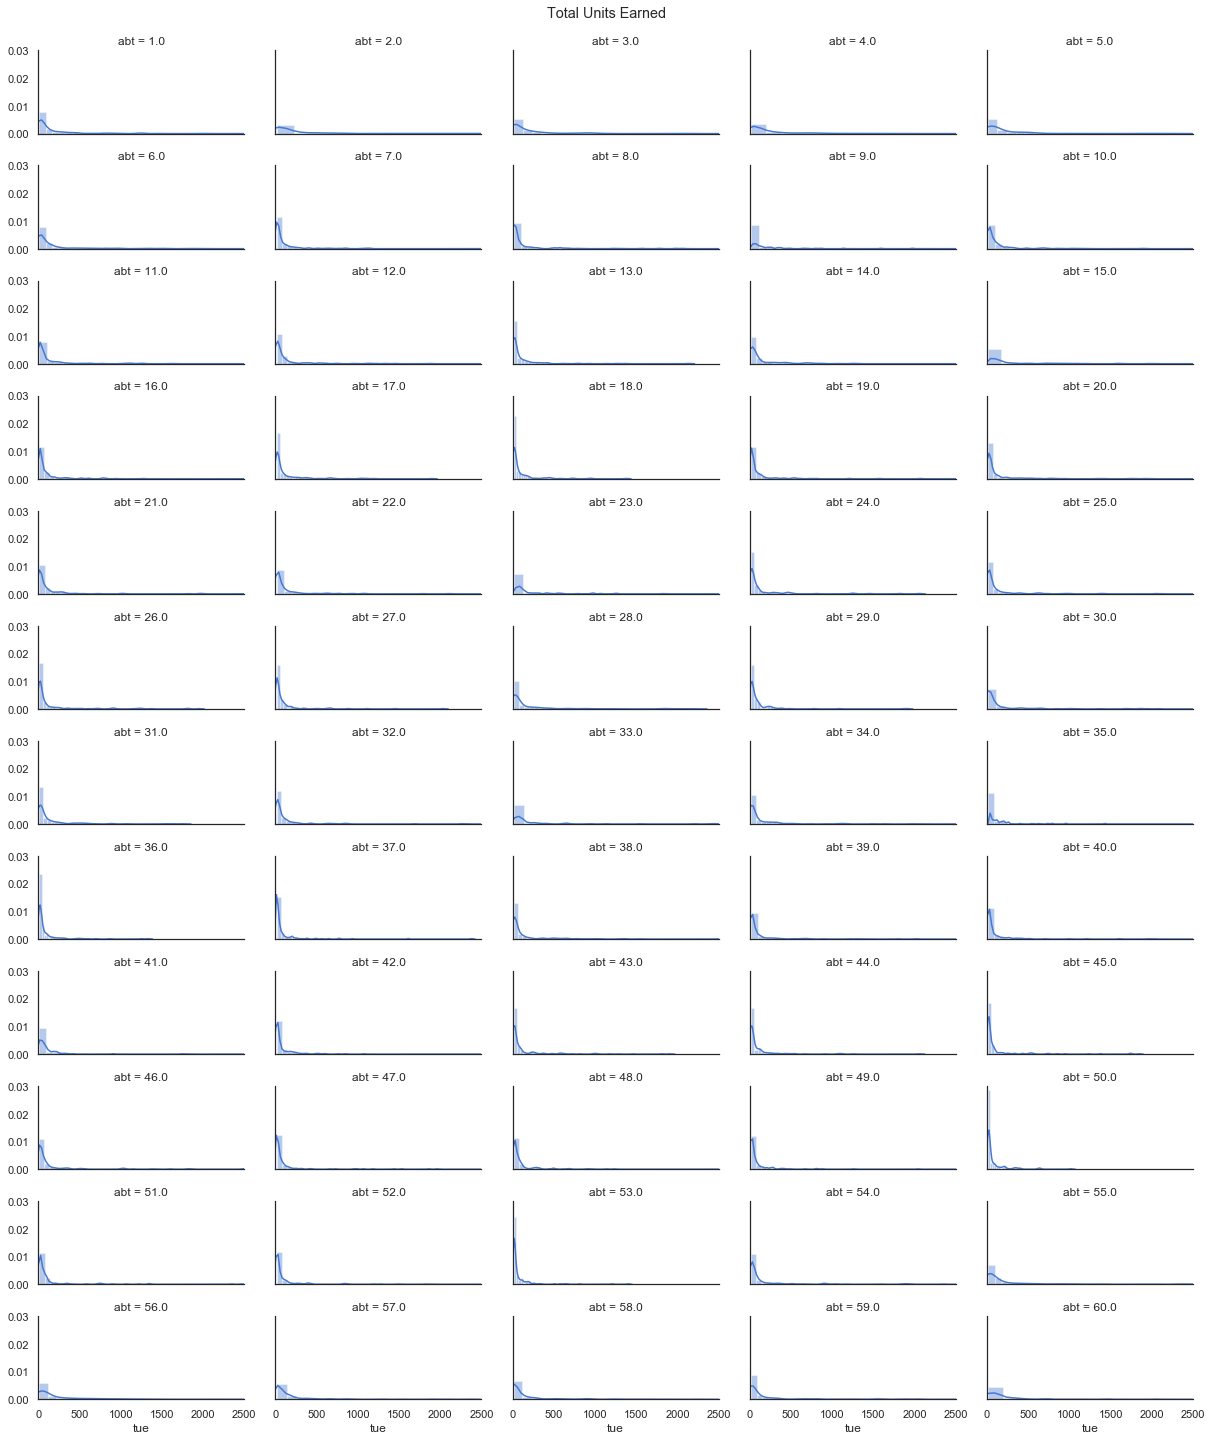

In [7]:
data.abt.nunique() # 60 groups
 
g = sns.FacetGrid(data, col="abt", col_wrap=5, height=1.7, aspect=2, xlim=(0, 4000))
g.map(sns.distplot, "ltv", hist=True, rug=False)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Life Time Value');

g = sns.FacetGrid(data, col="abt", col_wrap=5, height=1.7, aspect=2, xlim=(0, 1.25e+08))
g.map(sns.distplot, "ttime", hist=True, rug=False)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Total Time');

g = sns.FacetGrid(data, col="abt", col_wrap=5, height=1.7, aspect=2, xlim=(0, 2500))
g.map(sns.distplot, "tue", hist=True, rug=False)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Total Units Earned');

Distributions amongst the abt groups do not reveal any obvious trend, problem or quirk in the data. 

## Part 2 - Game economy

#### → Question: Using takeHome.csv, can you provide insight on how the time spent and units earned should relate to GXP and PXP, to further optimize the Mistplay economy by maximizing the LTV of users, while minimizing the total units earned (tue)? 

Let's write out the facts for GXP, PXP.

* GXP is gained from spending time in a specific game.
* PXP is obtained by leveling up in a game
* Leveling up in mistplay platform is done by reaching PXP thresholds

If we want to maximize ltv while minimizing tue, we have to know how an increase in PXP or GXP will affect LTV and TUE. 

Let's visualise the different economies first, to get any possible insight.

In [8]:
# Bucketizing abt
control = list(range(0, 7))+ list(range(55,61))
New_economy_1 = list(range(7,15))+ list(range(19,35))
New_economy_2 = list(range(15,17))+ list(range(35, 45))
New_economy_3 = list(range(17,19))+ list(range(45,55))

data.abt = data.abt.replace(control, 'control').replace(New_economy_1, 'New_economy_1').replace(New_economy_2, 'New_economy_2').replace(New_economy_3, 'New_economy_3')

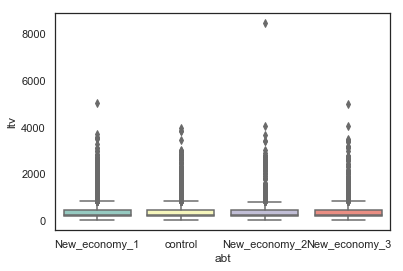

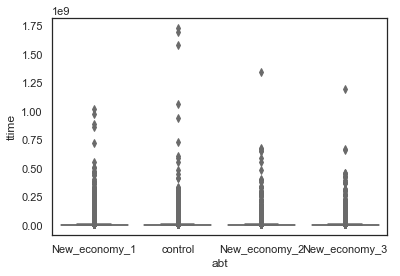

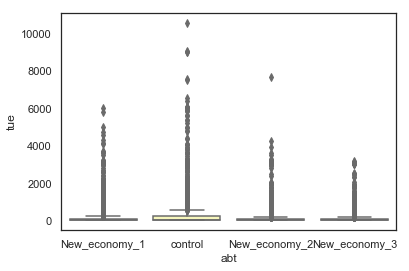

In [9]:
sns.boxplot(x="abt", y="ltv", data=data, palette="Set3")
plt.show();
sns.boxplot(x="abt", y="ttime", data=data, palette="Set3")
plt.show();
sns.boxplot(x="abt", y="tue", data=data, palette="Set3")
plt.show();

 Observations in Control (orange) group:  2018 
 Observations in New Economy 1 (blue) group:  3916 
 Observations in New Economy 2 (green) group:  2053 
 Observations in New Economy 3 (red) group:  2009


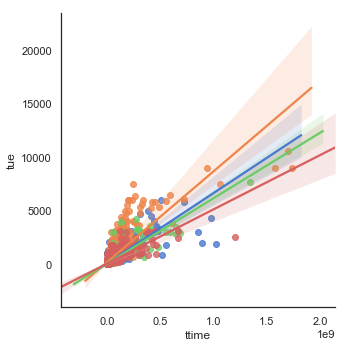

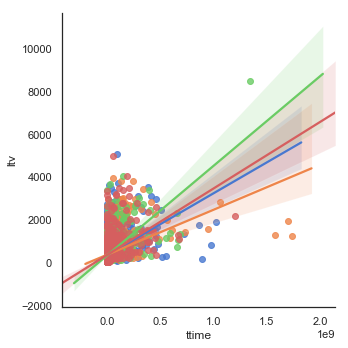

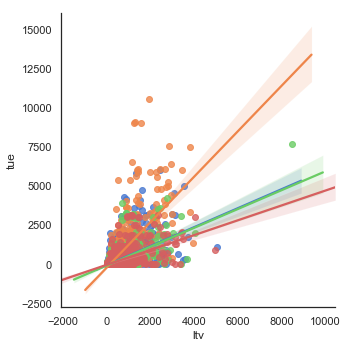

In [10]:
sns.lmplot(x= 'ttime', y = 'tue', hue = 'abt', data = data, legend=False)
sns.lmplot(x= 'ttime', y = 'ltv', hue = 'abt', data = data, legend=False)
sns.lmplot(x= 'ltv', y = 'tue', hue = 'abt', data = data, legend=False)

# Orange: control, Blue: economy 1, Green: economy 2, Red: economy 3
print(' Observations in Control (orange) group: ', len(data[data.abt == 'control']), '\n', 'Observations in New Economy 1 (blue) group: ', len(data[data.abt == 'New_economy_1']), '\n', 'Observations in New Economy 2 (green) group: ', len(data[data.abt == 'New_economy_2']), '\n', 'Observations in New Economy 3 (red) group: ', len(data[data.abt == 'New_economy_3']))



New Economy 3 seems to be outperforming other economies giving out less tue per both ltv and ttime while being the  constant for ltv to ttime. At this point we should look at how the economy (GXP and PXP) for economy 3 differs from other economies.

In [106]:
# Loading in txt file
txt = pd.read_csv('econs.txt', sep='\t')
txt.head()

,cumGXP,cumPXP,econ,lvl,cumTime,cumUnits
0,500.0,0,Controls,1,0.1,0
1,1500.0,200,Controls,2,0.1,20
2,3500.0,600,Controls,3,0.2,60
3,6500.0,1200,Controls,4,0.3,120
4,11000.0,2000,Controls,5,0.5,200


In [129]:
# Comparing Econ1 and Econ3
txt[txt.econ == 'Econ1'].head(10), txt[txt.econ == 'Econ3'].head(10)

(     cumGXP  cumPXP   econ  lvl  cumTime  cumUnits
 20    500.0       0  Econ1    1     0.06         0
 21   1500.0      80  Econ1    2     0.17        10
 22   3500.0     280  Econ1    3     0.39        30
 23   6500.0     605  Econ1    4     0.72        60
 24  10250.0    1045  Econ1    5     1.14       105
 25  15500.0    1695  Econ1    6     1.72       165
 26  22550.0    2595  Econ1    7     2.51       235
 27  31550.0    3795  Econ1    8     3.51       306
 28  42800.0    5395  Econ1    9     4.76       378
 29  56300.0    7345  Econ1   10     6.26       451,
       cumGXP  cumPXP   econ  lvl  cumTime  cumUnits
 100    500.0       0  Econ3    1     0.06         0
 101   1500.0      80  Econ3    2     0.17         8
 102   3500.0     280  Econ3    3     0.39        23
 103   6500.0     605  Econ3    4     0.72        45
 104  10250.0    1045  Econ3    5     1.14        79
 105  15500.0    1695  Econ3    6     1.72       124
 106  22550.0    2595  Econ3    7     2.51       176
 10

Econ1 and Econ3 have exactly the same thresholds, but the cumUnit gradient is steeper for Econ1. This would imply that we should look into reducing cumUnits attributed per level up (thereby minimizing tue).

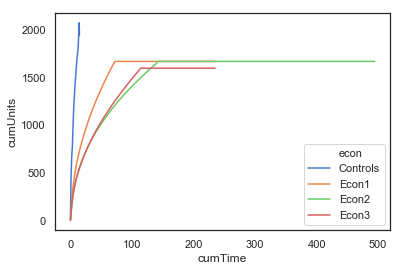

In [112]:
# Looking for steepness in earnings from spending time in-game
sns.lineplot(x='cumTime', y='cumUnits', hue='econ', data=txt)

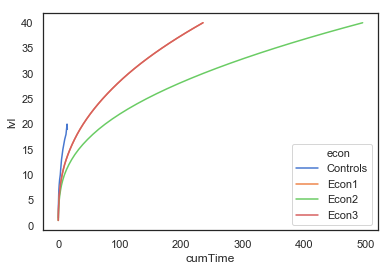

In [124]:
# How fast do users level up?
sns.lineplot(x='cumTime', y='lvl', hue='econ', data=txt)

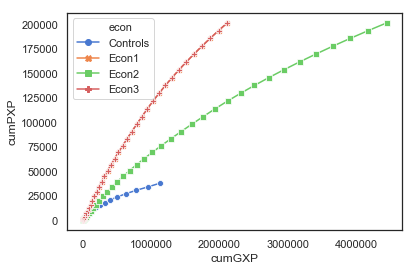

In [122]:
# Visualizing effects of lvlup faster 
sns.lineplot(x='cumGXP', y='cumPXP', hue='econ', style='econ', markers=True, dashes=False, data=txt)

Notedly, Econ3 seems to have a faster and more regular leveling up approach. This could mean that users get more motivated about the leveling up than the actual revenue retrieved.

## Insight
If we are seeking to maximize the LTV and minimize the TUE, we should investigate more economies that lvlup more consistently and reducing cumUnits given for each level-up.